### KNN with IRIS dataset $→$ Spotify

In [8]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
import pandas as pd
iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
target2name = {i:n for i, n in enumerate(iris['target_names'])}; target2name

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

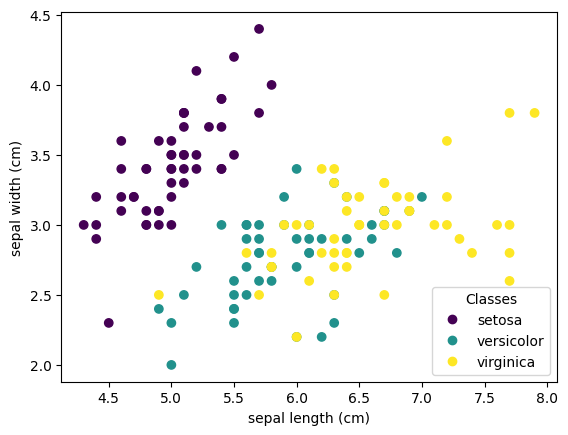

In [19]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris_df.iloc[:,0], iris_df.iloc[:,1], c = iris['target'])
ax.set(xlabel = iris_df.columns[0], ylabel = iris_df.columns[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

<ipython-input-23-5174eb88c749>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


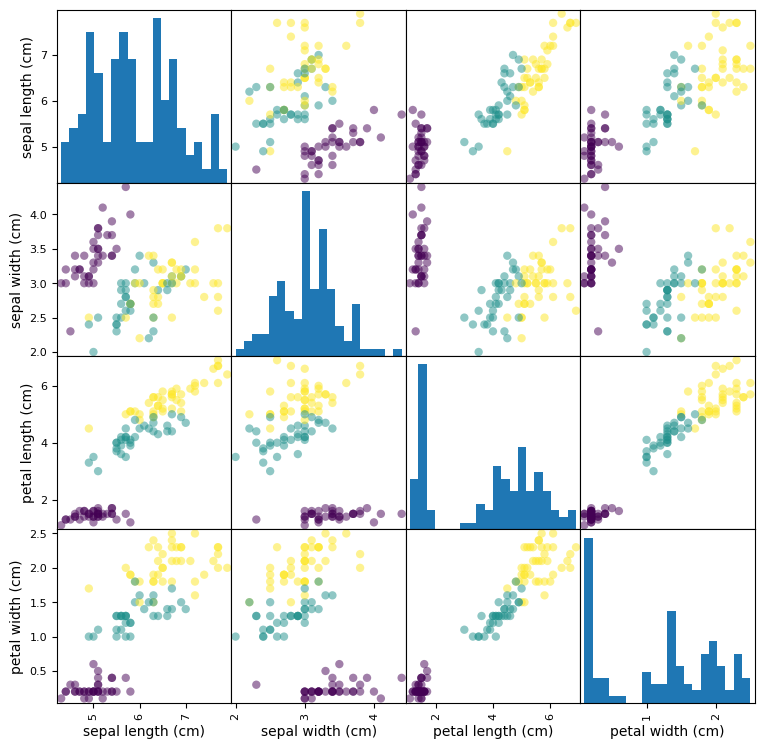

In [23]:
from matplotlib import cm
from sklearn.model_selection import train_test_split

X = iris_df.copy()
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# pair plot - won't show the interations but can see the distribution of each feature and pair correlations
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker="o", hist_kwds={'bins':20}, figsize=(9,9))

According to the pair plot above, other than the (sepal width, petal width) part, it appears that linear decision boundaries could effectively separate each class, implying that these features are going to be useful for classifying the targets.

### Create a classifier - knn

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

# fit (train) the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Test the classifier on the test data

The inefficiency of KNN is that the model should memorize all the training sets to make a prediction.

In [25]:
knn.score(X_test, y_test)

0.9736842105263158

### The choice of `k` and accuracy

([<matplotlib.axis.XTick at 0x7c4adb6870a0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

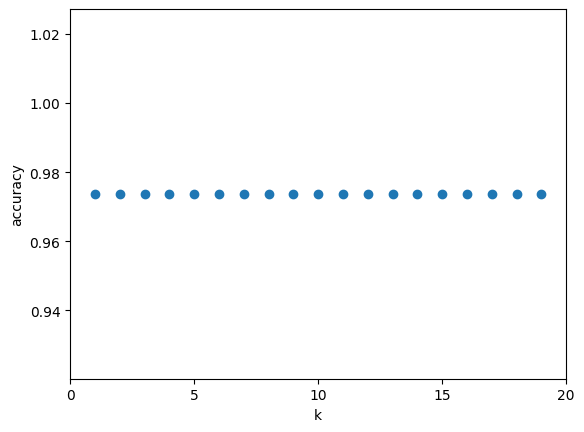

In [26]:
k_range = range(1,20)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Seems like this iris dataset was to easy to classify for kNN. I found the Spotify data that I thought might be relevant to experiment further on kNN.

https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

spotify = pd.read_csv('spotify_2000.csv', thousands=',')
spotify.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


The objective here to practice KNN would be, based on each track's audio features, would we be able to cluster similar genres/tracks together.

In [40]:
(min(spotify['Popularity']), max(spotify['Popularity']))

(11, 100)

In [41]:
p_labels = []
for p in spotify['Popularity']:
  if p > 0 and p <= 25:
    p_labels.append(0)
  elif p > 25 and p <= 50:
    p_labels.append(1)
  elif p > 50 and p <= 75:
    p_labels.append(2)
  elif p > 75 and p <= 100:
    p_labels.append(3)

p_labels

[2,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 1,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 3,


In [43]:
pd.Series(p_labels).value_counts()

2    1228
1     501
3     235
0      30
dtype: int64

kNN can be sensitive to imbalances in the class distribution. The majority class (in this class, the class 2) can dominate the prediction.

(array([ 16.,  36.,  97., 234., 334., 428., 501., 308.,  36.,   4.]),
 array([ 11. ,  19.9,  28.8,  37.7,  46.6,  55.5,  64.4,  73.3,  82.2,
         91.1, 100. ]),
 <BarContainer object of 10 artists>)

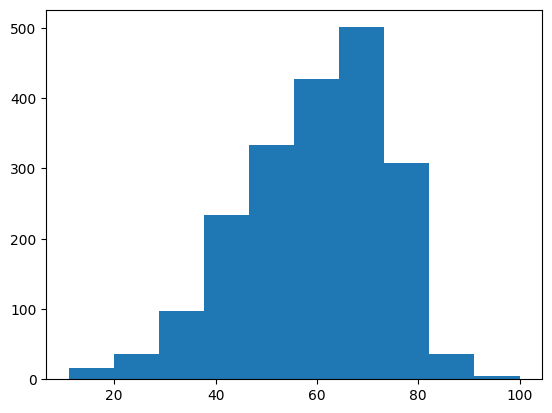

In [33]:
plt.hist(spotify['Popularity'])

In [34]:
spotify['Popularity'].quantile([0.25, 0.5, 0.75])

0.25    49.25
0.50    62.00
0.75    71.00
Name: Popularity, dtype: float64

So, I'll divide again popularity by the quantiles.

In [45]:
p_labels = []

for p in spotify['Popularity']:
  if p > 0 and p <= 49.25:
    p_labels.append(0)
  elif p > 49.25 and p <= 62:
    p_labels.append(1)
  elif p > 62 and p <= 71:
    p_labels.append(2)
  elif p > 71 and p <= 100:
    p_labels.append(3)

spotify['labels'] = p_labels
spotify.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,labels
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,2
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,2
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,3
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,1


In [46]:
spotify['labels'].value_counts()

1    540
0    499
2    497
3    458
Name: labels, dtype: int64

### Min-Max Scale

As kNN operates by calculating distance from one point to another, it is important to make features' scales similar to each other. I'd do Min-Max scale here.

In [47]:
spotify.columns

Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity', 'labels'],
      dtype='object')

In [48]:
X = spotify[['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness']]
X.head()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness
0,157,30,53,-14,11,68,201,94,3
1,135,79,50,-11,17,81,207,17,7
2,168,69,66,-9,7,52,341,2,17
3,173,96,43,-4,3,37,269,0,4
4,106,82,58,-5,10,87,256,1,3


In [49]:
y = spotify['labels']

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'X_train_scaled.shape: {X_train_scaled.shape}')
X_train_scaled

X_train_scaled.shape: (1495, 9)


array([[0.81547619, 0.25      , 0.30232558, ..., 0.06141016, 0.54545455,
        0.03773585],
       [0.52380952, 0.77083333, 0.52325581, ..., 0.12282032, 0.03030303,
        0.03773585],
       [0.38690476, 0.21875   , 1.        , ..., 0.10235027, 0.16161616,
        0.0754717 ],
       ...,
       [0.46428571, 0.36458333, 0.60465116, ..., 0.07808946, 0.68686869,
        0.03773585],
       [0.49404762, 0.58333333, 0.87209302, ..., 0.12964367, 0.        ,
        0.03773585],
       [0.48214286, 0.88541667, 0.76744186, ..., 0.20090978, 0.08080808,
        0.09433962]])

## fit_transform(X_train) vs. transform(X_test)

* The `fit` part calculates the necessary parameters to perform the transformation. For example, in normalizing, it'll calculate the mean and the standard deviation from the training set.
* The `_transform` part transforms the data based on the parameters calculated from `fit`.
* We apply the same parameters calculated from the training set to transform the test data, assuming they're from the same distribution.
* Importantly, by not calculating parameters of the test data, it prevents data leakage of test data into the model which is crucial in ML.




In [54]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print(f'Accuracy of kNN on training set: {knn.score(X_train_scaled, y_train):.2f}')

Accuracy of kNN on training set: 0.51


In [55]:
print(f'Accuracy of kNN on test set: {knn.score(X_test_scaled, y_test):.2f}')

Accuracy of kNN on test set: 0.30


([<matplotlib.axis.XTick at 0x7c4adac20430>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50')])

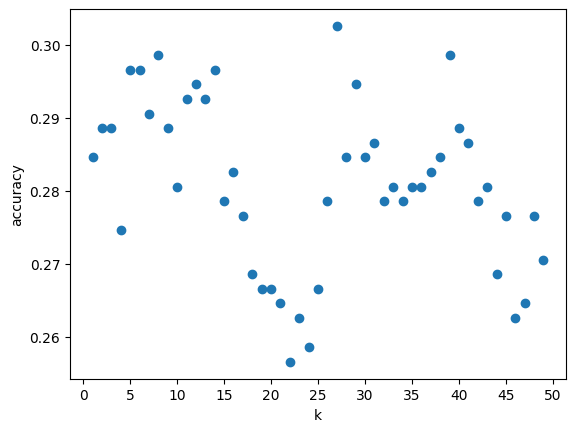

In [58]:
k_range = range(1,50)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  scores.append(knn.score(X_test_scaled, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])

The accuracy seems well scattered given a wide range of parameter k. Those features may not be relevant to classification of the discretized target value of popularity. I now wonder if we do a regression here, would it work better to predict the continuous popularity value.

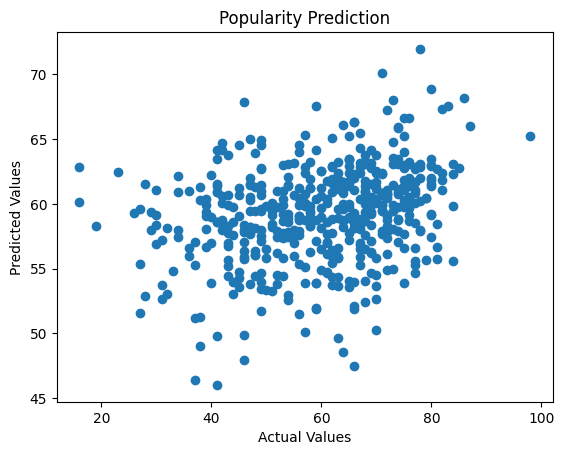

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = spotify['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Popularity Prediction')
plt.show()

As we saw from the distribution of the Popularity variable, the majority values are around 60. The plot shows even though the actual values range is from around 20 to 100, the predicted value has a way smaller range from 45 to 70.

In [61]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train) # adding the intercept part
sm_model = sm.OLS(y_train, X_train_sm).fit()

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     11.81
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           4.10e-18
Time:                        19:19:37   Log-Likelihood:                -6061.7
No. Observations:                1495   AIC:                         1.214e+04
Df Residuals:                    1485   BIC:                         1.220e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     68.2831      3.769     18.117      0.000      60.890      75.676
Beats Per Minute (BPM)    -0.0078      0.014     -0.568      0.570      -0.035       0.019
Energy                    -0.0576      0.032     -1.776      0.076      -0.121       0.006
Danceability               0.0535      0.029      1.874      0.061      -0.003       0.110
Loudness (dB)              0.8580      0.154      5.556      0.000       0.555       1.161
Liveness                  -0.1043      0.023     -4.595      0.000      -0.149      -0.060
Valence                    0.0379      0.020      1.942      0.052      -0.000       0.076
Length (Duration)         -0.0029      0.004     -0.732      0.464      -0.011       0.005
Acousticness              -0.0104      0.017     -0.607      0.544      -0.044       0.023
Speechiness                0.3084      0.082      3.766      0.000       0.148       0.469
==============================================================================
Omnibus:                       78.928   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.977
Skew:                          -0.604   Prob(JB):                     1.76e-20
Kurtosis:                       3.004   Cond. No.                     3.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

And the R^2 is 6%, a very low value, meaning the model explains 6% of the total variation in target given features.

## Summary of kNN

* kNN is used both in classification and regression. Simply put, it operates by identifying the `k` number of nearest neighbor points to a given test point from within the training dataset.
* In kNN, the default way to calculate the distance between points is the Euclidean method.
* The decision boundary in kNN is determined based on the training set data points. For a given point in the feature space, kNN identifies the nearest training points and their corresponding classes. The decision boundary is then defined at locations in the feature space where there is an equal distance to the nearest points of different classes.
* You can set the distance method differently. For example, a weighted method can assign higher weights to closer points.
* One thing about KNN is that KNN needs to remember all training data to make a prediction, which is not efficient as the training set gets larger.



One thought on posts regarding bias in ML algorithm - I think bias from the algorithm comes from the training dataset which inevitably has human bias, so isn't it obvious if the model is trained by (biased-unfiltered) dataset, the model gets biased in a similar way?